## Project Euler - Problem 124 - Ordered Radicals 

More info at: https://projecteuler.net/problem=124

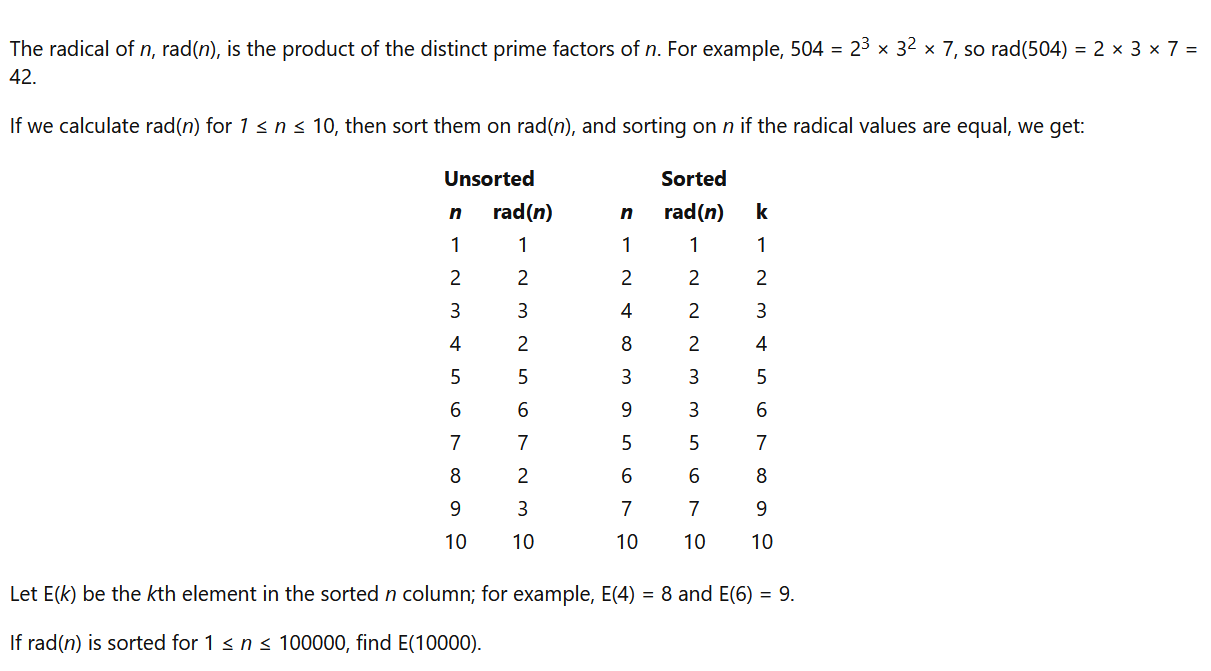

In [187]:
import numpy as np
import pandas as pd
import time as time

In [188]:
def prime_numbers_generator(n):
    primes = [2]
    for i in range(2,n+1):
        for e,p in enumerate(primes):
            #print(i,'-',p)
            #print(primes)
            if i%p == 0:
                #print('div-2')
                break
            elif e==len(primes)-1:
                primes.append(i)
                break
    return primes

In [189]:
def prime_factors_generator(n,prime_list):
    # Prime generation sub routine -> there must be a more efficient way in order to avoid calculating until the n itself
    #prime_list = prime_numbers_generator(n)
    #prime_list = 
    
    prime_factors = []
    while n != 1:
        for p in prime_list:
            if n%p == 0:
                n /= p
                prime_factors.append(p)
                break
            else:
                pass
    return prime_factors

In [190]:
radical = np.prod(list(set(prime_factors_generator(99998, prime_list))))
radical

99998

In [192]:
start = time.time()
prime_list = prime_numbers_generator(100000)
df_radicals = []

for i in range(1,100001):
    radical = int(np.prod(list(set(prime_factors_generator(i,prime_list)))))
    df_radicals.append([i,radical])
    
df_radicals = pd.DataFrame(df_radicals).sort_values(by=[1,0]).reset_index(drop=True).reset_index()
df_radicals['k'] = df_radicals['index']+1
df_radicals.rename(columns = {0:'n',1:'rad(n)'}, inplace=True)
df_radicals = df_radicals[['n','rad(n)','k']]

end_time = time.time()-start
df_radicals.tail(10)

,n,rad(n),k
99990,99982,99982,99991
99991,99983,99983,99992
99992,99985,99985,99993
99993,99986,99986,99994
99994,99987,99987,99995
99995,99989,99989,99996
99996,99991,99991,99997
99997,99993,99993,99998
99998,99995,99995,99999
99999,99998,99998,100000


In [195]:
df_radicals[df_radicals['k']==10000]

,n,rad(n),k
9999,21417,1947,10000
